# Tweedledee and Tweedledum
Alice stumbled on Tweedledum and Tweedledee who were grinning under a tree right by their house. Tweedledee and Tweedledum appear identical. If a brother is holding a red card, he will tell the truth, if he is holding a black card he will lie. The two brothers emerge from the house, and each makes a statement.

In [1]:
bro = ['Tweedledee', 'Tweedledum']
card = ['black', 'red']
dums = []
dees = []
for c in card:
    dums = dums + [('Tweedledum', c)]
    dees = dees + [('Tweedledee', c)]

goals = []
for dum in dums:
    for dee in dees:
        goals = goals + [(dum, dee)]
        goals = goals + [(dee, dum)]

In [2]:
bro0Truths = []
bro1Truths = []
for g in goals:
    if g[0][1] == 'red':
        bro0Truths.append(g)
    if g[1][1] == 'red':
        bro1Truths.append(g)

In [3]:
def complement(listOfGoals):
    return [g for g in goals if g not in listOfGoals]

def intersect(a, b):
    return [item for item in a if item in b]
    
def union(a, b):
    return list(a) + [item for item in b if item not in a]    

In [4]:
bro0Lies = complement(bro0Truths)
bro1Lies = complement(bro1Truths)

In [5]:
def broForName(number, name):
    blist = []
    for g in goals:
        if g[number][0] == name:
            blist.append(g)
    return blist

def broForCard(number, card):
    blist = []
    for g in goals:
        if g[number][1] == card:
            blist.append(g)
    return blist

## Problem 69 from Alice in PuzzleLand


In [6]:
bro0Text = "My brother is Tweedledee and he has a black card"
bro1Text = "My brother is Tweedledum and he has a red card"
bro0Statement = intersect(broForName(1,'Tweedledee'),broForCard(1,'black'))
bro1Statement = intersect(broForName(0,'Tweedledum'),broForCard(0,'red'))

In [7]:
print(bro0Statement)
print(bro1Statement)

[(('Tweedledum', 'black'), ('Tweedledee', 'black')), (('Tweedledum', 'red'), ('Tweedledee', 'black'))]
[(('Tweedledum', 'red'), ('Tweedledee', 'black')), (('Tweedledum', 'red'), ('Tweedledee', 'red'))]


In [8]:
bro0 = union(intersect(bro0Statement,bro0Truths),intersect(complement(bro0Statement),bro0Lies))

In [9]:
print(bro0)

[(('Tweedledum', 'red'), ('Tweedledee', 'black')), (('Tweedledee', 'black'), ('Tweedledum', 'black')), (('Tweedledum', 'black'), ('Tweedledee', 'red')), (('Tweedledee', 'black'), ('Tweedledum', 'red'))]


In [10]:
bro1 = union(intersect(bro1Statement,bro1Truths),intersect(complement(bro1Statement),bro1Lies))

In [11]:
p = intersect(bro0, bro1)

In [12]:
print("The solution is: " + str(p))

The solution is: [(('Tweedledee', 'black'), ('Tweedledum', 'black'))]


## Puzzle Solver

First we define a puzzle solving function - given a statement from each brother, we use the known 'true and false' options to create a list of all possible outcomes from the statments. If the statements from both brothers result in only one possible outcome, the puzzle has a solution.

In [13]:
def goalFromStatements(b0_statement, b1_statement, output=False):
    if (output):
        print("bro 0 statement " + str(b0_statement))
        print("bro 1 statement " + str(b1_statement))
    b0t = intersect(b0_statement, bro0Truths) 
    if (output):
        print('bro 0 truth: ' + str(b0t))
    b0l = intersect(complement(b0_statement), bro0Lies)
    if (output):
        print('bro 0 lies: ' + str(b0l))
    b0 = union(b0t, b0l)
    if (output):
        print('bro 0 possibilities: ' + str(b0))
    b1t = intersect(b1_statement, bro1Truths) 
    if (output):
        print('bro 1 truth: ' + str(b1t))
    b1l = intersect(complement(b1_statement), bro1Lies)
    if (output):
        print('bro 1 lies: ' + str(b1l))  
    b1 = union(b1t, b1l)
    if (output):
        print('bro1 possibilities: ' + str(b1))
    hiddenGoal = intersect(b0,b1)
    if (output):
        print(str(hiddenGoal))
    if (len(hiddenGoal) == 1):
        return hiddenGoal[0]
    else:
        return None

In [14]:
goalFromStatements(bro0Statement,bro1Statement,True)

bro 0 statement [(('Tweedledum', 'black'), ('Tweedledee', 'black')), (('Tweedledum', 'red'), ('Tweedledee', 'black'))]
bro 1 statement [(('Tweedledum', 'red'), ('Tweedledee', 'black')), (('Tweedledum', 'red'), ('Tweedledee', 'red'))]
bro 0 truth: [(('Tweedledum', 'red'), ('Tweedledee', 'black'))]
bro 0 lies: [(('Tweedledee', 'black'), ('Tweedledum', 'black')), (('Tweedledum', 'black'), ('Tweedledee', 'red')), (('Tweedledee', 'black'), ('Tweedledum', 'red'))]
bro 0 possibilities: [(('Tweedledum', 'red'), ('Tweedledee', 'black')), (('Tweedledee', 'black'), ('Tweedledum', 'black')), (('Tweedledum', 'black'), ('Tweedledee', 'red')), (('Tweedledee', 'black'), ('Tweedledum', 'red'))]
bro 1 truth: [(('Tweedledum', 'red'), ('Tweedledee', 'red'))]
bro 1 lies: [(('Tweedledum', 'black'), ('Tweedledee', 'black')), (('Tweedledee', 'black'), ('Tweedledum', 'black')), (('Tweedledee', 'red'), ('Tweedledum', 'black'))]
bro1 possibilities: [(('Tweedledum', 'red'), ('Tweedledee', 'red')), (('Tweedledum',

(('Tweedledee', 'black'), ('Tweedledum', 'black'))

Next, we define a set of statments for the brothers to use.

In [22]:
def selfStatement(number, name, card):
    return {'text': "My name is " + name + ", and I have a " + card + " card.", 'list': intersect(broForName(number, name),broForCard(number,card))}

def selfOrStatement(number, name, card):
    return {'text': "My name is " + name + " or I have a " + card + " card.", 'list': union(broForName(number, name),broForCard(number,card))}

def otherStatement(number, name, card):
    return {'text': "My brother's name is " + name + ", and he has a " + card + " card.", 'list': intersect(broForName(number, name),broForCard(number,card))}

def otherOrStatement(number, name, card):
    return {'text': "My brother's name is " + name + " or he has a " + card + " card.", 'list': union(broForName(number, name),broForCard(number,card))}

def selfNameStatement(number, name):
    return {'text': "My name is " + name + ".", 'list': broForName(number, name)}

def otherNameStatement(number, name):
    return {'text': "My brother's name is " + name + ".", 'list': broForName(number, name)}

def selfCardStatement(number, card):
    return {'text': "I have a " + card + " card.", 'list': broForCard(number, card)}

def otherCardStatement(number, card):
    return {'text': "My brother has a " + card + " card.", 'list': broForCard(number, card)}


In [23]:
selfStatement(0,'Tweedledee','red')

{'text': 'My name is Tweedledee, and I have a red card.',
 'list': [(('Tweedledee', 'red'), ('Tweedledum', 'black')),
  (('Tweedledee', 'red'), ('Tweedledum', 'red'))]}

In [24]:
selfStatement(0,'Tweedledee','black')

{'text': 'My name is Tweedledee, and I have a black card.',
 'list': [(('Tweedledee', 'black'), ('Tweedledum', 'black')),
  (('Tweedledee', 'black'), ('Tweedledum', 'red'))]}

In [25]:
otherStatement(1,'Tweedledee','red')

{'text': "My brother's name is Tweedledee, and he has a red card.",
 'list': [(('Tweedledum', 'black'), ('Tweedledee', 'red')),
  (('Tweedledum', 'red'), ('Tweedledee', 'red'))]}

In [26]:
bro0Statements = []
for b in bro:
    for c in card:
        bro0Statements.append(selfStatement(0,b,c))
        bro0Statements.append(otherStatement(1,b,c))
        bro0Statements.append(selfOrStatement(0,b,c))
        bro0Statements.append(otherOrStatement(1,b,c))
for b in bro:
    bro0Statements.append(selfNameStatement(0,b))
    bro0Statements.append(otherNameStatement(1,b))
for c in card:
    bro0Statements.append(selfCardStatement(0,c))
    bro0Statements.append(otherCardStatement(1,c))
len(bro0Statements)

24

In [27]:
bro1Statements = []
for b in bro:
    for c in card:
        bro1Statements.append(selfStatement(1,b,c))
        bro1Statements.append(otherStatement(0,b,c))
        bro1Statements.append(selfOrStatement(1,b,c))
        bro1Statements.append(otherOrStatement(0,b,c))
for b in bro:
    bro1Statements.append(selfNameStatement(1,b))
    bro1Statements.append(otherNameStatement(0,b))
for c in card:
    bro1Statements.append(selfCardStatement(1,c))
    bro1Statements.append(otherCardStatement(0,c))
len(bro1Statements)

24

Finally we iterate over all combinations of the statements from the two brothers to find the ones that generate a solvable puzzle.

In [40]:
count = 0
bro_count = {'bro0_red':0, 'bro0_black':0, 'bro1_red':0, 'bro1_black':0}
combo_count = {'both_red':0, 'both_black':0, 'one_each':0}
for s in bro0Statements:
    for t in bro1Statements:
        p = goalFromStatements(s['list'],t['list'])
        if (p != None):
            count = count + 1
            print('The first brother says: ' + s['text'])
            print('The second brother says: ' + t['text'])
            print("solution: " + str(p))
            if (p[0][1] == 'red'):
                bro_count['bro0_red'] = bro_count['bro0_red'] +1
            else: 
                bro_count['bro0_black'] = bro_count['bro0_black'] +1
            if (p[1][1] == 'red'):
                bro_count['bro1_red'] = bro_count['bro1_red'] +1
            else:
                bro_count['bro1_black'] = bro_count['bro1_black'] +1
            if (p[0][1] == 'red' and p[1][1] == 'red'):
                combo_count['both_red'] = combo_count['both_red'] +1
            elif (p[0][1] == 'black' and p[1][1] == 'black'):
                combo_count['both_black'] = combo_count['both_black'] +1
            else:
                combo_count['one_each'] = combo_count['one_each'] +1 
            #goalFromStatements(s['list'],t['list'],True)
            print("-----------------")
print("found " + str(count) + " puzzles")
print("distribution: " + str(bro_count))
print("distribution: " + str(combo_count))

The first brother says: My name is Tweedledee, and I have a black card.
The second brother says: My brother's name is Tweedledee, and he has a black card.
solution: (('Tweedledum', 'black'), ('Tweedledee', 'black'))
-----------------
The first brother says: My name is Tweedledee, and I have a black card.
The second brother says: My name is Tweedledee or I have a black card.
solution: (('Tweedledum', 'black'), ('Tweedledee', 'red'))
-----------------
The first brother says: My name is Tweedledee, and I have a black card.
The second brother says: My brother's name is Tweedledee or he has a black card.
solution: (('Tweedledum', 'black'), ('Tweedledee', 'red'))
-----------------
The first brother says: My name is Tweedledee, and I have a black card.
The second brother says: My brother's name is Tweedledee, and he has a red card.
solution: (('Tweedledum', 'black'), ('Tweedledee', 'black'))
-----------------
The first brother says: My name is Tweedledee, and I have a black card.
The second b

Out of 24^2 = 576 possible puzzles, only 168 combinations lead to actual puzzles. There are really two equivilant ways to state the same puzzle (for any puzzle, switching the brothers creates a different but equivalent puzzle), so ultimately there are really only 84 truly distinct puzzles from these lists of statements.

The distribution of the solutions is uniform - it is just as likely for a brother to have a red card as a black card.

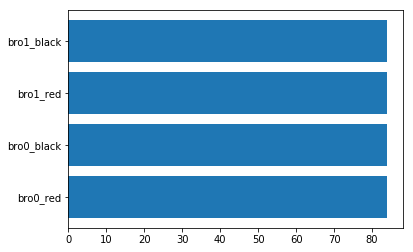

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

height = []
for b in bro_count:
    height.append(bro_count[b])
x_axis = np.arange(len(bro_count))    
plt.barh(x_axis, height)
plt.yticks(x_axis, bro_count)
plt.show()

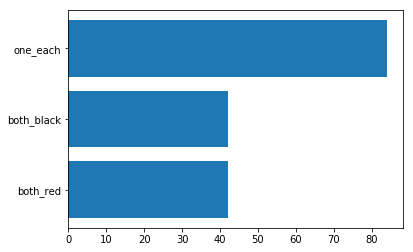

In [39]:
height = []
for b in combo_count:
    height.append(combo_count[b])
x_axis = np.arange(len(combo_count))    
plt.barh(x_axis, height)
plt.yticks(x_axis, combo_count)
plt.show()